<h1>Training the model</h1>

In [2]:
#Importing Libraries
#Create baseline model 

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Import the dataset

train_data_set = pd.read_csv("dataset/merge_train_set.csv")
test_data_set = pd.read_csv("dataset/merge_test_set.csv")

#Delete unwanted column
train_data_set.drop(["Unnamed: 0"], axis = 1, inplace = True)
test_data_set.drop(["Unnamed: 0"], axis = 1, inplace = True)

#Extract features and 
x  = train_data_set.drop(["Sales"], axis =1).values

y = train_data_set["Sales"].values


#Scaling the dataset


sc = StandardScaler()

x = sc.fit_transform(x)

#train test split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 15)
model = RandomForestRegressor(n_estimators = 30, random_state = 30)

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
mean_absolute_error(ytest, ypred)


678.200160354487

<h2>Creating deep learning Model</h2>

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

dp_model  = Sequential()

dp_model.add(Dense(25,input_shape = (19,), activation = "relu"))

dp_model.add(Dense(5, activation = "relu"))

dp_model.add(Dense(1, activation = "linear"))

dp_model.compile(loss ="mean_squared_error", optimizer = Adam(learning_rate=0.01), metrics = ["mae"])

dp_model.summary()

2022-08-11 14:41:44.540345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-11 14:41:44.540411: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-11 14:42:13.475019: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-11 14:42:13.475082: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-11 14:42:13.475139: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bams-HP-EliteBook-Folio-9480m): /proc/driver/nvidia/version does not exist
2022-08-11 14:42:13.518852: I tensorflow/core/p

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                500       
                                                                 
 dense_1 (Dense)             (None, 5)                 130       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 636
Trainable params: 636
Non-trainable params: 0
_________________________________________________________________


In [4]:
hist = dp_model.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=500,batch_size=400)

2022-08-11 14:42:14.028296: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 61846292 exceeds 10% of free system memory.


Epoch 1/500
2035/2035 [==============================] - 6s 2ms/step - loss: 8826663.0000 - mae: 1920.9541 - val_loss: 5986896.5000 - val_mae: 1621.9584
Epoch 2/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5974456.5000 - mae: 1620.6909 - val_loss: 5917083.5000 - val_mae: 1613.0718
Epoch 3/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5912304.0000 - mae: 1612.2660 - val_loss: 5866146.0000 - val_mae: 1592.1288
Epoch 4/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5875105.0000 - mae: 1606.0521 - val_loss: 5855727.5000 - val_mae: 1617.2212
Epoch 5/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5849602.5000 - mae: 1602.7719 - val_loss: 5814999.5000 - val_mae: 1595.2289
Epoch 6/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5825237.5000 - mae: 1599.8159 - val_loss: 5782861.0000 - val_mae: 1591.3582
Epoch 7/500
2035/2035 [==============================] - 4s 2ms/step - loss: 57971

2035/2035 [==============================] - 4s 2ms/step - loss: 5325687.5000 - mae: 1537.7911 - val_loss: 5300904.0000 - val_mae: 1524.4440
Epoch 55/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5323843.5000 - mae: 1537.4619 - val_loss: 5301325.0000 - val_mae: 1530.1104
Epoch 56/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5319871.5000 - mae: 1536.9960 - val_loss: 5304863.0000 - val_mae: 1532.6608
Epoch 57/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5318354.0000 - mae: 1536.4630 - val_loss: 5293070.0000 - val_mae: 1536.3741
Epoch 58/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5316976.0000 - mae: 1536.2236 - val_loss: 5305597.5000 - val_mae: 1544.1027
Epoch 59/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5315026.5000 - mae: 1535.9385 - val_loss: 5296047.5000 - val_mae: 1529.2753
Epoch 60/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5311368.500

2035/2035 [==============================] - 4s 2ms/step - loss: 5239334.0000 - mae: 1525.2234 - val_loss: 5213555.5000 - val_mae: 1524.4429
Epoch 108/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5237237.0000 - mae: 1524.8848 - val_loss: 5251575.0000 - val_mae: 1539.7345
Epoch 109/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5238746.5000 - mae: 1525.3722 - val_loss: 5202976.0000 - val_mae: 1517.9509
Epoch 110/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5237130.0000 - mae: 1525.4609 - val_loss: 5208267.5000 - val_mae: 1520.8367
Epoch 111/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5233294.5000 - mae: 1524.6418 - val_loss: 5204502.5000 - val_mae: 1523.5472
Epoch 112/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5233310.0000 - mae: 1524.8289 - val_loss: 5212507.5000 - val_mae: 1515.2047
Epoch 113/500
2035/2035 [==============================] - 4s 2ms/step - loss: 52317

Epoch 160/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5175536.5000 - mae: 1517.1437 - val_loss: 5143342.0000 - val_mae: 1511.8951
Epoch 161/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5168476.5000 - mae: 1515.8654 - val_loss: 5147233.0000 - val_mae: 1514.5674
Epoch 162/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5163908.0000 - mae: 1515.5027 - val_loss: 5138082.5000 - val_mae: 1501.7225
Epoch 163/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5162858.0000 - mae: 1515.2635 - val_loss: 5137812.0000 - val_mae: 1512.9750
Epoch 164/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5160443.5000 - mae: 1515.0856 - val_loss: 5130499.5000 - val_mae: 1504.4694
Epoch 165/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5159425.5000 - mae: 1514.7646 - val_loss: 5150661.0000 - val_mae: 1506.2061
Epoch 166/500
2035/2035 [==============================] - 4s 2ms/step

Epoch 213/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5117474.5000 - mae: 1509.0100 - val_loss: 5097995.0000 - val_mae: 1495.8328
Epoch 214/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5122235.5000 - mae: 1509.2893 - val_loss: 5082570.5000 - val_mae: 1495.6564
Epoch 215/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5118801.5000 - mae: 1508.8646 - val_loss: 5104257.5000 - val_mae: 1502.9448
Epoch 216/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5118710.5000 - mae: 1509.0602 - val_loss: 5089861.0000 - val_mae: 1502.0753
Epoch 217/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5117667.0000 - mae: 1508.6467 - val_loss: 5082935.5000 - val_mae: 1502.1438
Epoch 218/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5117080.5000 - mae: 1508.5208 - val_loss: 5116065.5000 - val_mae: 1519.9597
Epoch 219/500
2035/2035 [==============================] - 4s 2ms/step

Epoch 266/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5099192.0000 - mae: 1505.4054 - val_loss: 5107634.5000 - val_mae: 1519.1843
Epoch 267/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5098463.5000 - mae: 1505.4012 - val_loss: 5081576.5000 - val_mae: 1495.3745
Epoch 268/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5097822.0000 - mae: 1505.2246 - val_loss: 5106391.0000 - val_mae: 1486.1515
Epoch 269/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5099116.5000 - mae: 1505.2860 - val_loss: 5088618.0000 - val_mae: 1510.1125
Epoch 270/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5099440.0000 - mae: 1505.4462 - val_loss: 5083651.5000 - val_mae: 1512.9236
Epoch 271/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5098228.0000 - mae: 1505.2781 - val_loss: 5076978.5000 - val_mae: 1504.7688
Epoch 272/500
2035/2035 [==============================] - 4s 2ms/step

Epoch 319/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5078265.5000 - mae: 1502.6356 - val_loss: 5056410.5000 - val_mae: 1500.9724
Epoch 320/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5079996.5000 - mae: 1502.9618 - val_loss: 5044001.0000 - val_mae: 1490.5466
Epoch 321/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5078970.0000 - mae: 1502.9397 - val_loss: 5055736.0000 - val_mae: 1491.4044
Epoch 322/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5079828.5000 - mae: 1502.8375 - val_loss: 5054517.5000 - val_mae: 1501.6172
Epoch 323/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5080227.0000 - mae: 1503.0599 - val_loss: 5050140.0000 - val_mae: 1497.7871
Epoch 324/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5078817.0000 - mae: 1503.1968 - val_loss: 5084733.5000 - val_mae: 1482.0690
Epoch 325/500
2035/2035 [==============================] - 4s 2ms/step

Epoch 372/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5073095.5000 - mae: 1502.3616 - val_loss: 5058960.5000 - val_mae: 1480.3960
Epoch 373/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5071242.0000 - mae: 1502.0753 - val_loss: 5046560.5000 - val_mae: 1498.6611
Epoch 374/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5072426.0000 - mae: 1502.0144 - val_loss: 5090908.0000 - val_mae: 1480.3263
Epoch 375/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5071215.5000 - mae: 1501.7988 - val_loss: 5061125.0000 - val_mae: 1498.2930
Epoch 376/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5070970.0000 - mae: 1501.7224 - val_loss: 5066783.5000 - val_mae: 1493.2676
Epoch 377/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5070423.5000 - mae: 1502.0654 - val_loss: 5044146.0000 - val_mae: 1490.8716
Epoch 378/500
2035/2035 [==============================] - 4s 2ms/step

Epoch 425/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5049794.0000 - mae: 1499.5603 - val_loss: 5048575.5000 - val_mae: 1512.8053
Epoch 426/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5050041.5000 - mae: 1499.7892 - val_loss: 5034919.0000 - val_mae: 1502.6886
Epoch 427/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5048283.0000 - mae: 1499.3546 - val_loss: 5033333.5000 - val_mae: 1482.4611
Epoch 428/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5048449.5000 - mae: 1499.8287 - val_loss: 5035878.5000 - val_mae: 1498.4199
Epoch 429/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5045225.5000 - mae: 1499.2844 - val_loss: 5048841.0000 - val_mae: 1498.0023
Epoch 430/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5045086.5000 - mae: 1499.0299 - val_loss: 5018216.0000 - val_mae: 1498.4636
Epoch 431/500
2035/2035 [==============================] - 4s 2ms/step

Epoch 478/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5024776.5000 - mae: 1495.7666 - val_loss: 5018939.0000 - val_mae: 1499.1404
Epoch 479/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5023551.0000 - mae: 1495.7283 - val_loss: 5014564.0000 - val_mae: 1484.7914
Epoch 480/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5023973.0000 - mae: 1495.8668 - val_loss: 5006223.5000 - val_mae: 1482.5051
Epoch 481/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5023677.0000 - mae: 1495.5599 - val_loss: 5014234.5000 - val_mae: 1481.5786
Epoch 482/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5023641.5000 - mae: 1495.4924 - val_loss: 4996454.5000 - val_mae: 1483.7462
Epoch 483/500
2035/2035 [==============================] - 4s 2ms/step - loss: 5022990.5000 - mae: 1495.6777 - val_loss: 5009629.0000 - val_mae: 1485.2362
Epoch 484/500
2035/2035 [==============================] - 4s 2ms/step

In [5]:
hist = dp_model.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=150,batch_size=400)

2022-08-11 15:16:50.972989: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 61846292 exceeds 10% of free system memory.


Epoch 1/150
2035/2035 [==============================] - 4s 2ms/step - loss: 5018686.0000 - mae: 1494.3578 - val_loss: 5037852.5000 - val_mae: 1508.8549
Epoch 2/150
2035/2035 [==============================] - 4s 2ms/step - loss: 5017115.5000 - mae: 1494.1661 - val_loss: 4990515.0000 - val_mae: 1489.8867
Epoch 3/150
2035/2035 [==============================] - 4s 2ms/step - loss: 5018652.5000 - mae: 1494.4637 - val_loss: 4994051.5000 - val_mae: 1489.9005
Epoch 4/150
2035/2035 [==============================] - 4s 2ms/step - loss: 5017685.5000 - mae: 1494.3927 - val_loss: 5002277.0000 - val_mae: 1484.1400
Epoch 5/150
2035/2035 [==============================] - 4s 2ms/step - loss: 5017793.0000 - mae: 1494.0653 - val_loss: 5007401.0000 - val_mae: 1489.8751
Epoch 6/150
2035/2035 [==============================] - 4s 2ms/step - loss: 5018280.0000 - mae: 1494.2548 - val_loss: 4995697.5000 - val_mae: 1486.2463
Epoch 7/150
2035/2035 [==============================] - 4s 2ms/step - loss: 50178

2035/2035 [==============================] - 4s 2ms/step - loss: 5005504.0000 - mae: 1491.4498 - val_loss: 4988228.5000 - val_mae: 1475.7789
Epoch 55/150
2035/2035 [==============================] - 4s 2ms/step - loss: 5006010.0000 - mae: 1491.4750 - val_loss: 5015743.0000 - val_mae: 1505.6969
Epoch 56/150
2035/2035 [==============================] - 4s 2ms/step - loss: 5006981.0000 - mae: 1491.7628 - val_loss: 4994039.5000 - val_mae: 1479.1259
Epoch 57/150
2035/2035 [==============================] - 4s 2ms/step - loss: 5005653.0000 - mae: 1491.2079 - val_loss: 4986166.0000 - val_mae: 1480.2394
Epoch 58/150
2035/2035 [==============================] - 4s 2ms/step - loss: 5005204.0000 - mae: 1491.3308 - val_loss: 4985329.5000 - val_mae: 1480.5327
Epoch 59/150
2035/2035 [==============================] - 4s 2ms/step - loss: 5006502.5000 - mae: 1491.5028 - val_loss: 5005044.5000 - val_mae: 1477.6613
Epoch 60/150
2035/2035 [==============================] - 4s 2ms/step - loss: 5004712.500

2035/2035 [==============================] - 4s 2ms/step - loss: 4997538.0000 - mae: 1489.9161 - val_loss: 4977898.0000 - val_mae: 1483.4863
Epoch 108/150
2035/2035 [==============================] - 4s 2ms/step - loss: 4998722.0000 - mae: 1490.1423 - val_loss: 4999860.5000 - val_mae: 1504.8373
Epoch 109/150
2035/2035 [==============================] - 4s 2ms/step - loss: 4998603.5000 - mae: 1490.0143 - val_loss: 4975820.0000 - val_mae: 1479.1600
Epoch 110/150
2035/2035 [==============================] - 4s 2ms/step - loss: 4995611.5000 - mae: 1489.4645 - val_loss: 4985623.0000 - val_mae: 1496.2504
Epoch 111/150
2035/2035 [==============================] - 4s 2ms/step - loss: 4997676.0000 - mae: 1489.8058 - val_loss: 4968405.5000 - val_mae: 1486.0588
Epoch 112/150
2035/2035 [==============================] - 4s 2ms/step - loss: 4995854.0000 - mae: 1489.5441 - val_loss: 4997202.0000 - val_mae: 1486.4052
Epoch 113/150
2035/2035 [==============================] - 4s 2ms/step - loss: 49981

<h1>More on evaluating the model </h1>

In [30]:
#Visulization of result on 200 random samples
ypred = model.predict(xtest)

In [61]:
df = pd.DataFrame()
df["Predicted_value"]= ypred 
df["True_value"] = ytest
df["Abs_diff"] = abs(df["True_value"] -df["Predicted_value"])




In [63]:
#EVALUATING THE MODE BASED ON A CRITERION 0f +/-100

df["prediction_100"] = np.where(df["Abs_diff"]<=100, 1,0)

accuracy = df["prediction_100"].sum()/ytest.shape[0]

print("Acurracy for criterion +/- 100 is" + str(accuracy))

Acurracy for criterion +/- 100 is0.25369884291345934


In [65]:
#ASSUMMING +-500 is the condition

#EVALUATING THE MODE BASED ON A CRITERION 0f +/-500

df["prediction_500"] = np.where(df["Abs_diff"]<=500, 1,0)

accuracy = df["prediction_500"].sum()/ytest.shape[0]

print("Acurracy for criterion +/- 500 is" + str(accuracy))

Acurracy for criterion +/- 500 is0.5505598647280306


In [66]:
#ASSUMMING +-1000 is the condition

#EVALUATING THE MODE BASED ON A CRITERION 0f +/-1000

df["prediction_1000"] = np.where(df["Abs_diff"]<=1000, 1,0)

accuracy = df["prediction_1000"].sum()/ytest.shape[0]

print("Acurracy for criterion +/- 1000 is" + str(accuracy))

Acurracy for criterion +/- 1000 is0.7780301019455177


In [105]:
#Viisualizing the result

#Get 300 random samples from the dataframe

viz_data = df.sample(200)
id_x = [i for i in range(200)]

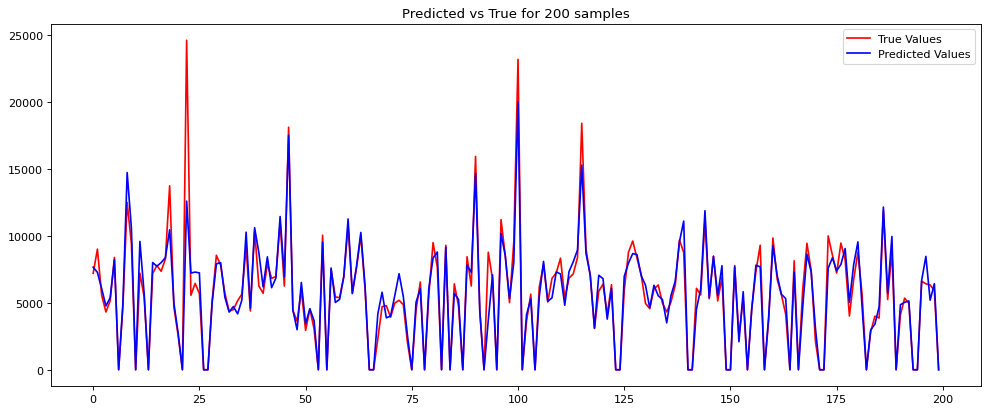

In [120]:
figure(figsize=(15, 6), dpi=80)

# # plot average sales over time(year-month)
plt.plot( id_x, viz_data["True_value"], color = "r", label = "True Values")


plt.plot( id_x, viz_data["Predicted_value"],color = "b", label = "Predicted Values")

plt.title("Predicted vs True for 200 samples")

plt.legend()

# # plot precent change for sales over time(year-month)
# ax2 = viz_data["Predicted_value"].plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")


Final Submission


In [124]:
test_data_sets = sc.fit_transform(test_data_set)
result = model.predict(test_data_sets)

In [127]:
result

array([ 5940.6301923 ,  8079.3202023 ,  8365.74696088, ...,
       16939.59562393, 20423.24865361,  6321.03468367])

In [129]:
submission = pd.read_csv("dataset/sample_submission.csv")

In [131]:
submission["Sales"] = result

In [133]:
submission.to_csv("submission.csv")